In [82]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [83]:
class State(TypedDict):
    number: int
    result: str

In [84]:
graph = StateGraph(State)

In [85]:
def print_number(state: State) -> State:
    print(f"Current number: {state['number']}")
    return state

def decrement(state: State) -> State:
    state['number'] = state['number'] - 1
    return state

def check_number(state: State):
    if state['number'] <= 0:
        state['result'] = "Finished"
        return "Finished"
    else:
        state['result'] = "decrement"
        return "decrease_number"

In [86]:
graph.add_node('print_number', print_number)
graph.add_node('decrement', decrement)

In [87]:
graph.add_edge(START, 'print_number')
graph.add_edge('print_number', 'decrement')
graph.add_conditional_edges('decrement', check_number, {
    "Finished": END,
    "decrease_number": 'print_number'
})


In [88]:
workflow = graph.compile()

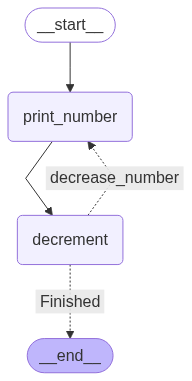

In [89]:
# to visualize the graph, you can use the following code
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [90]:
initial_state = {"number": 5}
result = workflow.invoke(initial_state)

Current number: 5
Current number: 4
Current number: 3
Current number: 2
Current number: 1
